In [1]:
##The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

In [2]:
#Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read the dataset
df= pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [6]:
df.fillna(df.median(),inplace=True)

In [7]:
df.shape

(908, 13)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [9]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [12]:
# Correct common typos and convert strings to booleans
df['fbs'] = df['fbs'].replace({'FALSE': False, 'TRUE': True, 'TURE': True}).astype(int)
df['exang'] = df['exang'].replace({'FALSE': False, 'TRUE': True, 'TURE': True}).astype(int)

In [13]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang         int32
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [14]:
target=df[['restecg']]
features=df.drop(columns='restecg')

In [15]:
target.value_counts()

restecg         
normal              542
lv hypertrophy      187
st-t abnormality    179
dtype: int64

In [16]:
features.shape

(908, 12)

In [17]:
# Check for missing values
features.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

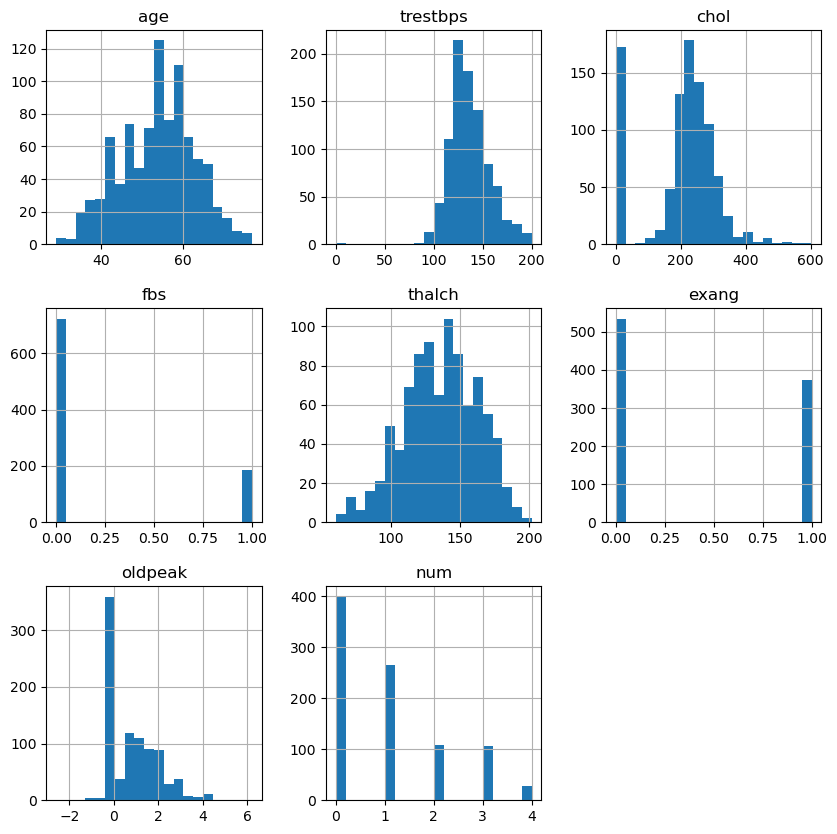

In [18]:
# Visualize distributions of numerical features
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [19]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang         int32
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [20]:
cat_col = [i for i in features.columns if features[i].dtype=='O']
df[cat_col] = df[cat_col].astype(str)


In [21]:
num_col = [i for i in features.columns if features[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'num']

In [22]:
df[num_col].dtypes

age           int64
trestbps      int64
chol          int64
fbs           int32
thalch        int64
exang         int32
oldpeak     float64
num           int64
dtype: object

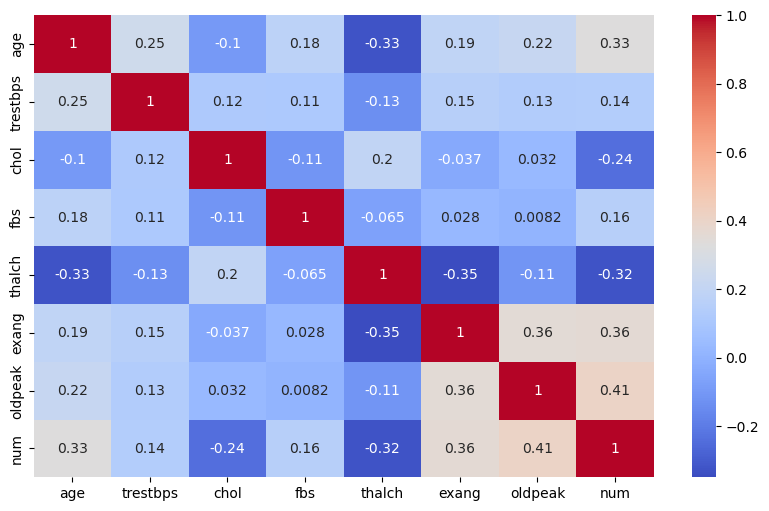

In [23]:
# Check correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
features[cat_col]

,sex,cp,slope,thal
0,Male,typical angina,downsloping,fixed defect
1,Male,atypical angina,flat,fixed defect
2,Male,asymptomatic,flat,fixed defect
3,Male,typical angina,flat,fixed defect
4,Male,asymptomatic,flat,fixed defect
...,...,...,...,...
903,Male,asymptomatic,upsloping,reversable defect
904,Male,asymptomatic,flat,reversable defect
905,Male,non-anginal,downsloping,normal
906,Male,non-anginal,downsloping,fixed defect


In [25]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang         int32
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [26]:
features[num_col]

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
0,63,145,233,1,150,0,2.3,0
1,41,135,203,0,132,0,0.0,0
2,57,140,192,0,148,0,0.4,0
3,52,118,186,0,190,0,0.0,0
4,57,110,201,0,126,1,1.5,0
...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,0,1.5,4
904,62,166,170,0,120,1,3.0,4
905,56,170,0,0,123,1,2.5,4
906,56,144,208,1,105,1,0.5,4


In [27]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [28]:
ord_enc = make_pipeline(OrdinalEncoder())

In [29]:
transformer= ColumnTransformer([('ord',ord_enc,cat_col)])

In [30]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['sex', 'cp', 'slope', 'thal'])])>

In [31]:
df1 = pd.DataFrame(transformer.fit_transform(features))
df1

,0,1,2,3
0,1.0,3.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,3.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
903,1.0,0.0,2.0,2.0
904,1.0,0.0,1.0,2.0
905,1.0,2.0,0.0,1.0
906,1.0,2.0,0.0,0.0


In [32]:
simple_impute= SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [33]:
df1 =pd.DataFrame(simple_impute.fit_transform(df1))
df1

,0,1,2,3
0,1.0,3.0,0.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,3.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
903,1.0,0.0,2.0,2.0
904,1.0,0.0,1.0,2.0
905,1.0,2.0,0.0,1.0
906,1.0,2.0,0.0,0.0


In [34]:
simple_impute1=SimpleImputer(missing_values=np.nan,strategy='median')

In [35]:
df2=pd.DataFrame(simple_impute1.fit_transform(features[num_col]))

In [36]:
stand_sca = StandardScaler()

In [37]:
df2=pd.DataFrame(stand_sca.fit_transform(df2))

In [38]:
df2

,0,1,2,3,4,5,6,7
0,1.006027,0.567394,0.281297,1.976894,0.524183,-0.834983,1.354403,-0.881977
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.834983,-0.815718,-0.881977
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.834983,-0.438305,-0.881977
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.834983,-0.815718,-0.881977
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,1.197629,0.599578,-0.881977
...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,-0.834983,0.599578,2.615119
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.197629,2.014874,2.615119
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.197629,1.543109,2.615119
906,0.241249,0.518352,0.058155,1.976894,-1.155538,1.197629,-0.343952,2.615119


In [39]:
features1=pd.concat([df1,df2],axis=1,ignore_index=True)
features1
old_name=range(0,5)
new_name=cat_col
old_name1=range(5,12)
new_name1=num_col
features1=features1.rename(columns=dict(zip(old_name,new_name)))
features1

,sex,cp,slope,thal,4,5,6,7,8,9,10,11
0,1.0,3.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,-0.834983,1.354403,-0.881977
1,1.0,1.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.834983,-0.815718,-0.881977
2,1.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.834983,-0.438305,-0.881977
3,1.0,3.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.834983,-0.815718,-0.881977
4,1.0,0.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,1.197629,0.599578,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,-0.834983,0.599578,2.615119
904,1.0,0.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.197629,2.014874,2.615119
905,1.0,2.0,0.0,1.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.197629,1.543109,2.615119
906,1.0,2.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,1.197629,-0.343952,2.615119


In [40]:
features1=features1.rename(columns=dict(zip(old_name1,new_name1)))
features1

,sex,cp,slope,thal,4,age,trestbps,chol,fbs,thalch,exang,oldpeak
0,1.0,3.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,-0.834983,1.354403,-0.881977
1,1.0,1.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.834983,-0.815718,-0.881977
2,1.0,0.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.834983,-0.438305,-0.881977
3,1.0,3.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.834983,-0.815718,-0.881977
4,1.0,0.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,1.197629,0.599578,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,2.0,2.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,-0.834983,0.599578,2.615119
904,1.0,0.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.197629,2.014874,2.615119
905,1.0,2.0,0.0,1.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.197629,1.543109,2.615119
906,1.0,2.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,1.197629,-0.343952,2.615119


In [41]:
x_train,x_test,y_train,y_test= train_test_split(features1,target,train_size=0.75,random_state=100)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(681, 12)
(227, 12)
(681, 1)
(227, 1)


In [43]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [47]:
# Convert all column names to strings to ensure compatibility
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [48]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [49]:
y_pred= dec_tree.predict(x_test)

In [50]:
y_pred

array(['normal', 'normal', 'normal', 'normal', 'lv hypertrophy', 'normal',
       'normal', 'lv hypertrophy', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'lv hypertrophy', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', '

In [51]:
accuracy_score(y_test,y_pred)

0.5550660792951542

In [52]:
precision_score(y_test,y_pred,average='weighted')

0.35709616516778653

In [53]:
recall_score(y_test,y_pred,average='weighted')

0.5550660792951542

In [54]:
f1_score(y_test,y_pred,average='weighted')

0.42205359074567644

In [55]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6]}

In [56]:
grid_search= GridSearchCV(dec_tree,params)

In [57]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [58]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [59]:
best_model=grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

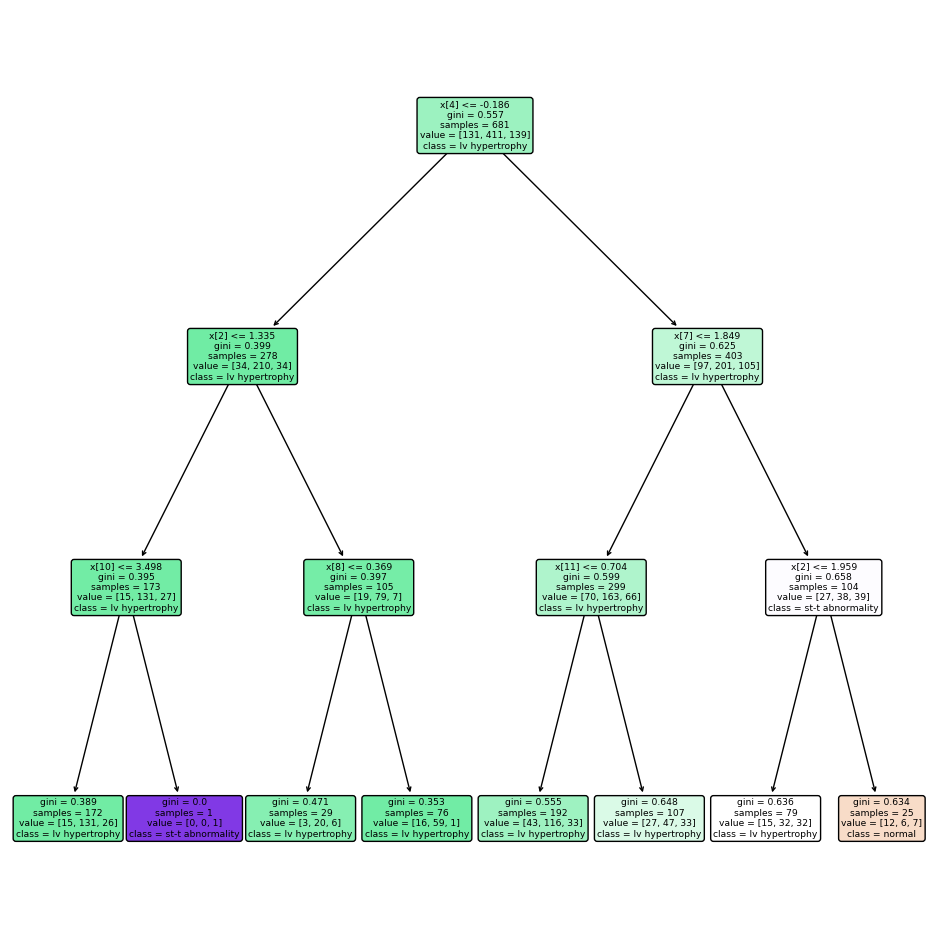

In [60]:
#plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(dec_tree,filled=True,max_depth=3,rounded=True,class_names=['normal','lv hypertrophy','st-t abnormality']);    